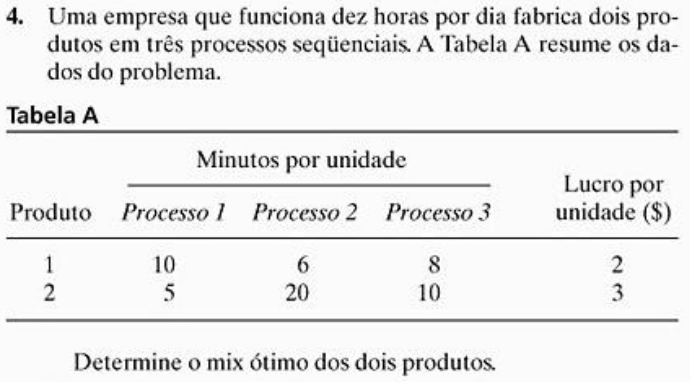

In [20]:
%pip install docplex

Note: you may need to restart the kernel to use updated packages.


In [21]:
from docplex.mp.model import Model

# Criação do modelo com um nome descritivo
model = Model('Mix_Otimo_de_Producao')

In [22]:
# --- Parâmetros extraídos da Tabela A ---

# Dados gerais
nProdutos = 2
nProcessos = 3

# Lucro por unidade de cada produto
lucro_por_unidade = {1: 2, 2: 3} #

# Tempo (em minutos) que cada produto consome em cada processo
tempo_processo_1 = {1: 10, 2: 5} #
tempo_processo_2 = {1: 6, 2: 20} #
tempo_processo_3 = {1: 8, 2: 10} #

# Limite de capacidade diária em minutos
# A empresa funciona 10 horas por dia => 10 * 60 = 600 minutos
limite_tempo_minutos = 600 #

In [23]:
# 1. Variáveis de Decisão
# Define as variáveis que o modelo precisa descobrir: a quantidade a produzir de cada produto.
# Ex: Produto_1, Produto_2
idx_produtos = range(1, nProdutos + 1)
qtd_a_produzir = model.continuous_var_dict(idx_produtos, name='Produto')


# 2. Função Objetivo
# Define a meta: maximizar o lucro total.
# Lucro Total = (Lucro P1 * Qtd P1) + (Lucro P2 * Qtd P2)
lucro_total = model.sum(lucro_por_unidade[i] * qtd_a_produzir[i] for i in idx_produtos)
model.maximize(lucro_total)


# 3. Restrições
# Define as regras/limites que a solução deve respeitar.

# Restrição do Processo 1: O tempo total usado no Processo 1 não pode exceder 600 minutos.
model.add_constraint(model.sum(tempo_processo_1[i] * qtd_a_produzir[i] for i in idx_produtos) <= limite_tempo_minutos)

# Restrição do Processo 2: O tempo total usado no Processo 2 não pode exceder 600 minutos.
model.add_constraint(model.sum(tempo_processo_2[i] * qtd_a_produzir[i] for i in idx_produtos) <= limite_tempo_minutos)

# Restrição do Processo 3: O tempo total usado no Processo 3 não pode exceder 600 minutos.
model.add_constraint(model.sum(tempo_processo_3[i] * qtd_a_produzir[i] for i in idx_produtos) <= limite_tempo_minutos)

docplex.mp.LinearConstraint[](8Produto_1+10Produto_2,LE,600)

In [ ]:
# Aciona o solver para encontrar a solução
print("--- Resolvendo o modelo ---")
solucao = model.solve(log_output=True)

print('\n------ SOLUÇÃO ÓTIMA ------\n')
print(solucao)

--- Resolvendo o modelo ---
Version identifier: 22.1.2.0 | 2024-12-10 | f4cec290b
CPXPARAM_Read_DataCheck                          1
Using devex.

------ SOLUÇÃO ÓTIMA ------

solution for: Mix_Otimo_de_Producao
objective: 148.235
status: OPTIMAL_SOLUTION(2)
Produto_1=52.941
Produto_2=14.118

